[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/System2Dofs.ipynb)

In [103]:
try:
    import numpy as np
    from matplotlib import pyplot as plt 
    import scipy
except ModuleNotFoundError:
    import os
    os.system("pip install numpy")
    os.system("pip install matplotlib")
    os.system("pip install scipy")
    from matplotlib import pyplot as plt 
    from scipy.integrate import odeint
from typing import Iterable

In [104]:
n = 2
m1, m2 = 100, 200
k1, k2 = 200, 550
M = [[m1, 0],
     [0, m2]]
K = [[k1+k2, -k2],
     [-k2, k2]]
C = [[1, 0],
     [-1, 2]]
C = 50*np.array(C)

In [105]:
def normalize_matrix(B: np.ndarray):
    n = B.shape[0]
    V = np.copy(B)
    for i in range(n):
        V[:, i] = np.linalg.norm(B[:, i])
    return V

def get_randomdirection_generalizedeigen(n: int):
    A = np.random.rand(n,n)
    B = np.random.rand(n,n)
    A += np.transpose(A)
    B += np.transpose(B)
    _, Pas = np.linalg.eigh(A)
    As = 1 + 9*np.random.rand(n)
    _, Pbs = np.linalg.eigh(B)
    Bs = 1 + 9*np.random.rand(n)
    A = Pas @ np.diag(As) @ Pas.T
    B = Pbs @ np.diag(Bs) @ Pbs.T
    _, B = scipy.linalg.eigh(A, B)
    return normalize_matrix(B)

In [111]:
# Hipoteses iniciais
n = 3
msoriginal = 1 + 9 * np.random.rand(n)
wnsoriginal = 2 + 5 * np.random.rand(n)
xisoriginal = 0.7*np.random.rand(n)/np.sqrt(2)
ksoriginal = msoriginal * wnsoriginal**2
csoriginal = 2 * xisoriginal * msoriginal * wnsoriginal
Vori = get_randomdirection_generalizedeigen(msoriginal, ksoriginal)
print("Original values:")
print("    ms = ", msoriginal)
print("    cs = ", csoriginal)
print("    ks = ", ksoriginal)
print("    wn = ", wnsoriginal)
print("    xi = ", xisoriginal)
print("Vetores transformacao:")
print(V)
eig, phi = np.linalg.eig(V)

M = np.array(Vori @ np.diag(msoriginal) @ Vori.T)
C = np.array(Vori @ np.diag(csoriginal) @ Vori.T)
K = np.array(Vori @ np.diag(ksoriginal) @ Vori.T)

Original values:
    ms =  [7.33706023 7.19709121 4.81833306]
    cs =  [25.39743892  5.41984595 10.27873337]
    ks =  [143.60180687  68.27181484 193.05733308]
    wn =  [4.42403863 3.07993975 6.3298693 ]
    xi =  [0.3912181  0.12225249 0.16850704]
Vetores transformacao:
[[-0.3305412   0.64615319 -0.64171476]
 [-0.69156604 -0.72351913 -0.33197564]
 [-0.64224522  0.24291176  0.69137135]]
la.det(V) =  0.9913903218246983
eigvals =  [-0.68178208+0.7250494j -0.68178208-0.7250494j  1.00087518+0.j       ]
(0.9913903218246979+0j)


In [109]:
ms, _ = np.linalg.eigh(M)
cs, _ = np.linalg.eigh(C)
ks, _ = np.linalg.eigh(K)
print("M = ")
print("   eigvals = ", ms)
print("   ->  sum = ", np.sum(ms))
print("   -> prod = ", np.prod(ms))
print("  original = ", np.sort(msoriginal))
print("C = ")
print("   eigvals = ", cs)
print("   ->  sum = ", np.sum(cs))
print("   -> prod = ", np.prod(cs))
print("  original = ", np.sort(csoriginal))
print("K = ")
print("   eigvals = ", ks)
print("   ->  sum = ", np.sum(ks))
print("   -> prod = ", np.prod(ks))
print("  original = ", np.sort(ksoriginal))
print("")
print("sqrt(eigsk/eigsm) = ", np.sort(np.sqrt(ks/ms)))
print("          ->  sum = ", np.sum(np.sqrt(ks/ms)))
print("          -> prod = ", np.prod(np.sqrt(ks/ms)))
print("     wns original = ", np.sort(wnsoriginal))
print("          ->  sum = ", np.sum(wnsoriginal))
print("          -> prod = ", np.prod(wnsoriginal))

M = 
   eigvals =  [-4.44089210e-16 -2.22044605e-16  5.65503442e+00]
   ->  sum =  5.655034422174466
   -> prod =  5.576294466665664e-31
  original =  [1.10926378 2.03506562 3.03266849]
C = 
   eigvals =  [-2.78582685e-16  7.22671895e-16  8.94534749e+00]
   ->  sum =  8.945347494749733
   -> prod =  -1.8009120374427842e-30
  original =  [0.96534976 3.27818581 5.77042777]
K = 
   eigvals =  [-1.62773475e-14 -1.48622093e-15  6.54736833e+01]
   ->  sum =  65.47368331977371
   -> prod =  1.5839219588149107e-27
  original =  [13.81362783 39.33609025 39.85627887]

sqrt(eigsk/eigsm) =  [2.58714978 3.4026381  6.0541992 ]
          ->  sum =  12.04398708634592
          -> prod =  53.29592941223945
     wns original =  [2.60534155 3.62523284 5.95495082]
          ->  sum =  12.185525207263968
          -> prod =  56.244330348158584


In [108]:
_, B = scipy.linalg.eigh(K, M)
V = normalize_matrix(B)
ms = np.diag(V.T @ M @ V)
cs = np.diag(V.T @ C @ V)
ks = np.diag(V.T @ K @ V)
wns = np.sqrt(ks/ms)
xis = cs/np.sqrt(4*ms*ks)

LinAlgError: The leading minor of order 2 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

In [ ]:
V = np.copy(B)
for i in range(n):
    V[:, i] /= np.sqrt(np.sum(B[:, i]**2))
print("Vori = ")
print(Vori)
print("V = ")
print(V)
MY = V.T @ M @ V
MY[np.abs(MY)<1e-9] = 0
CY = V.T @ C @ V
CY[np.abs(CY)<1e-9] = 0
KY = V.T @ K @ V
KY[np.abs(KY)<1e-9] = 0
print("V.T @ M @ V = ")
print(MY)
print("msoriginal = ", msoriginal)
print("V.T @ C @ V = ")
print(CY)
print("msoriginal = ", csoriginal)
print("V.T @ K @ V = ")
print(KY)
print("msoriginal = ", ksoriginal)

Vori = 
[[-0.64615319  0.64171476 -0.3305412 ]
 [ 0.72351913  0.33197564 -0.69156604]
 [-0.24291176 -0.69137135 -0.64224522]]
V = 
[[-0.3305412   0.64615319 -0.64171476]
 [-0.69156604 -0.72351913 -0.33197564]
 [-0.64224522  0.24291176  0.69137135]]
V.T @ M @ V = 
[[9.45837739 0.         0.        ]
 [0.         8.10519166 0.        ]
 [0.         0.         5.5439568 ]]
msoriginal =  [8.10519166 5.5439568  9.45837739]
V.T @ C @ V = 
[[ 0.46214469  0.          0.        ]
 [ 0.         13.62526748  0.        ]
 [ 0.          0.          5.61570748]]
msoriginal =  [13.62526748  5.61570748  0.46214469]
V.T @ K @ V = 
[[ 43.13779193   0.           0.        ]
 [  0.          60.25092328   0.        ]
 [  0.           0.         171.45347542]]
msoriginal =  [ 60.25092328 171.45347542  43.13779193]


## Resolvendo de forma numerica

In [ ]:
K = np.array(K, dtype="float64")
M = np.array(M, dtype="float64")
n = K.shape[0]
Z = np.zeros((n, n))
I = np.eye(n)
MI = np.linalg.solve(M, I)
MC = np.linalg.solve(M, C)
MK = np.linalg.solve(M, K)
A = np.block([[  Z,   I],
              [-MK, -MC]])
B = np.block([[Z],[MI]])


In [ ]:
def Force(y: np.ndarray, t: float):
    Amp, w = 200, 3.1116
    Amp = 0
    F = np.zeros(n)
    F[1] = Amp*np.sin(w*t)
    return F

def dydt(y: np.ndarray, t: float):
    F = Force(y, t)
    return A @ y + B @ F

In [ ]:
x0 = np.random.rand(n)  # Initial position for every body
dx0 = np.random.rand(n)  # Initial velocity for every body
# x0 = [1, -0.3]
# dx0 = [0, 0]
X0 = np.concatenate([x0, dx0])

In [ ]:
t = np.arange(0, 40, 0.1)
X = scipy.integrate.odeint(dydt, X0, t)
x = X[:, :n].T
dx = X[:, n:].T

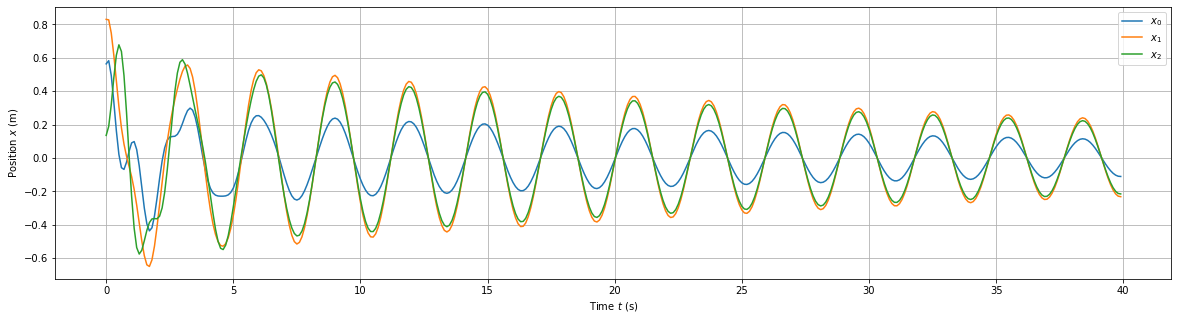

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.plot(t, x[i], label=f"$x_{i}$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Position $x$ (m)")
plt.grid()

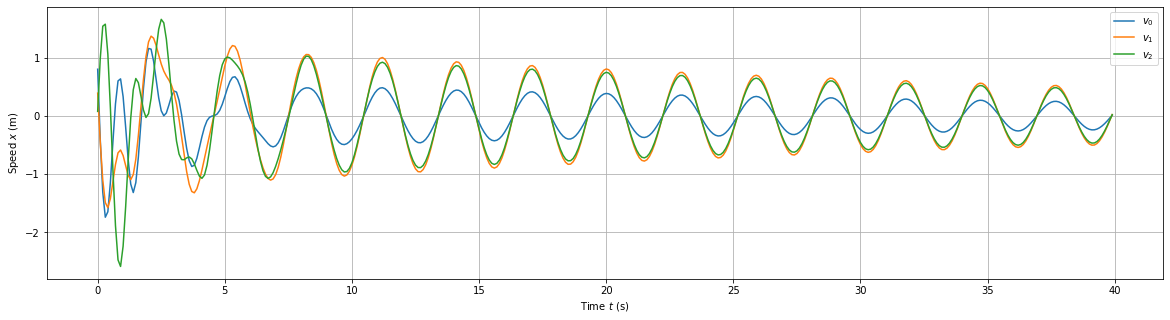

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.plot(t, dx[i], label=f"$v_{i}$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Speed $x$ (m)")
plt.grid()

Sample rate = 10.000000 Hz
   Duration = 39.900000 s


(0.0, 1.0)

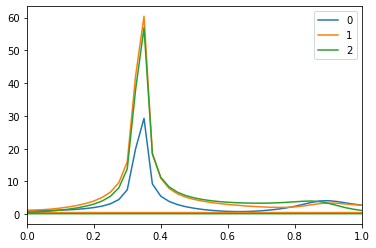

In [ ]:
SAMPLE_RATE = 1/(t[1]-t[0])
DURATION = t[-1]
N = int(SAMPLE_RATE * DURATION)+1
print("Sample rate = %.6f Hz" % SAMPLE_RATE)
print("   Duration = %.6f s" % DURATION)
xf = scipy.fft.fftfreq(N, 1/SAMPLE_RATE)
for i in range(n):
    yf = scipy.fft.fft(x[i])
    plt.plot(xf, np.abs(yf), label="%d"%i)
    plt.legend()
plt.xlim(0, 1)

## Usando coordenadas modais

In [ ]:
def get_amortcoefs(M: np.ndarray, C: np.ndarray, K: np.ndarray):
    n = M.shape[0]
    lams, B = scipy.linalg.eigh(K, M)
    wns = np.sqrt(lams)
    MC = np.linalg.solve(M, C)
    MK = np.linalg.solve(M, K)
    Z = np.zeros((n, n))
    I = np.eye(n)
    A = np.block([[  Z,   I],
                  [-MK, -MC]])
    eigvals, eigvecs = np.linalg.eig(A)
    modeigs = np.abs(eigvals)
    xis = np.zeros(len(wns), dtype="object")
    for i, wn in enumerate(wns):
        diff = np.abs(modeigs - wn)
        index = np.where(diff == np.min(diff))[0][0]
        xis[i] = np.abs(np.real(eigvals[index])/wn)
    return xis, wns, B

def get_malcoefs(M: np.ndarray, C: np.ndarray, K: np.ndarray):
    wn2, B = scipy.linalg.eigh(K, M)
    V = np.copy(B)
    for i in range(len(wn2)):
        V[:, i] /= np.sqrt(np.sum(B[:, i]**2))
    ms = np.real(np.diag(V.T @ M @ V))
    cs = np.real(np.diag(V.T @ C @ V))
    ks = np.real(np.diag(V.T @ K @ V))
    return ms, cs, ks

In [ ]:
xis, wns, B = get_amortcoefs(M, C, K)
ms, cs, ks = get_malcoefs(M, C, K)
# ms, Pm = np.linalg.eigh(M)
#ks = ms*wns**2
#cs = 2*xis*np.sqrt(ms*ks)

print("ms = ", ms)
print("   = ", msoriginal)
print("cs = ", cs)
print("   = ", csoriginal)
print("ks = ", ks)
print("   = ", ksoriginal)
print("wns = ", wns)
print("    = ", np.sqrt(ks/ms))
print("wno = ", wnsoriginal)
print("xis = ", xis)
print("    = ", cs/np.sqrt(4*ks*ms))
print("xio = ", xisoriginal)

ms =  [9.45837739 8.10519166 5.5439568 ]
   =  [8.10519166 5.5439568  9.45837739]
cs =  [ 0.46214469 13.62526748  5.61570748]
   =  [13.62526748  5.61570748  0.46214469]
ks =  [ 43.13779193  60.25092328 171.45347542]
   =  [ 60.25092328 171.45347542  43.13779193]
wns =  [2.13560356 2.72646677 5.56113231]
    =  [2.13560356 2.72646677 5.56113231]
wno =  [2.72646677 5.56113231 2.13560356]
xis =  [0.01143959624342396 0.30828439615567016 0.09107337198481538]
    =  [0.0114396  0.3082844  0.09107337]
xio =  [0.3082844  0.09107337 0.0114396 ]


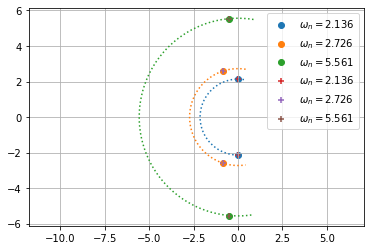

In [ ]:
theta = np.linspace(np.pi/2-np.pi/20, 1.5*np.pi+np.pi/20, 129)
for xi, wn in zip(xis, wns):
    mu = np.sqrt(1-xi**2)
    plt.plot(wn*np.cos(theta), wn*np.sin(theta), ls="dotted")
    plt.scatter( (-wn*xi, -wn*xi), (mu*wn, -mu*wn), label=r"$\omega_n=%.3f$"%wn)
for m, c, k in zip(ms, cs, ks):
    wn = np.sqrt(k/m)
    xi = c/np.sqrt(4*m*k)
    mu = np.sqrt(1-xi**2)
    plt.scatter( (-wn*xi, -wn*xi), (mu*wn, -mu*wn), marker="+", label=r"$\omega_n=%.3f$"%wn)

plt.axis("equal")
plt.grid()
plt.legend()
plt.show()

In [ ]:
y0 = B.T @ M @ x0
dy0 = B.T @ M @ dx0
print(" y0 = ", y0)
print("dy0 = ", dy0)

 y0 =  [-2.56821163 -0.27891627 -1.28564256]
dy0 =  [-1.93171376  0.94590134 -1.38619432]


A solucao para cada modo é dado por

$$
y(t) = y_0 \cdot y_{pos}(t) + \dot{y}_0 \cdot y_{vel}(t)
$$

Onde

$$
y_{pos}(t) = \exp \left(-\xi \omega_n t\right) \cdot \left[ \cos \mu \omega_n t + \dfrac{\xi}{\mu} \cdot \sin \mu \omega_n t\right]
$$
$$
y_{vel}(t) = \exp \left(-\xi \omega_n t\right)\cdot \dfrac{1}{\mu \omega_n} \cdot \sin \mu \omega_n t
$$


In [ ]:
Y = np.zeros((n, len(t)))

for i, (xi, wn) in enumerate(zip(xis, wns)):
    mu = np.sqrt(1-xi**2)
    ypos = np.exp(-xi*wn*t)*(np.cos(mu*wn*t) + (xi/mu)*np.sin(mu*wn*t))
    yvel = np.exp(-xi*wn*t)*np.sin(mu*wn*t)/(mu*wn)
    Y[i] += y0[i] * ypos + dy0[i] * yvel

Y.shape =  (3, 400)
B.shape =  (3, 3)


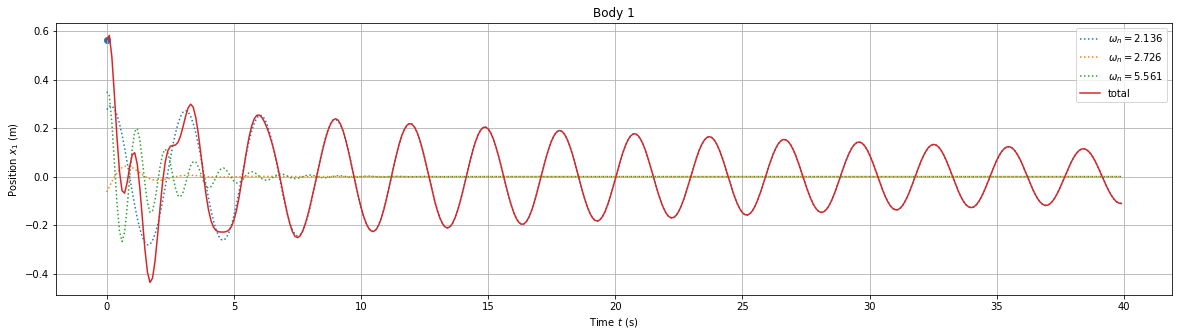

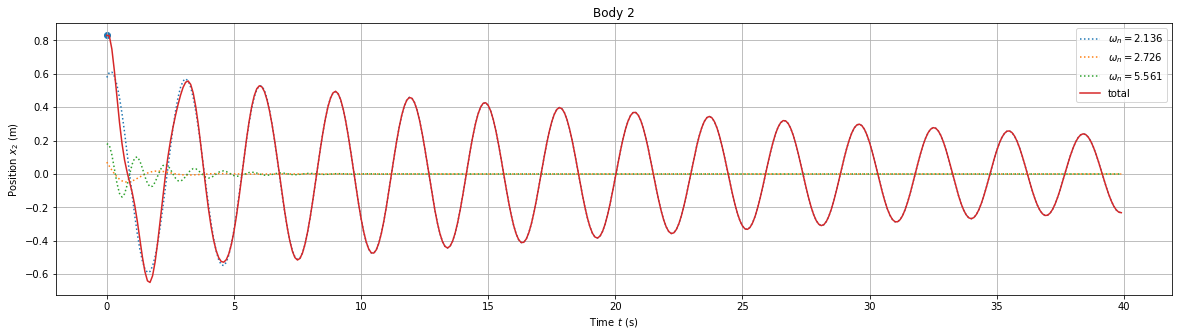

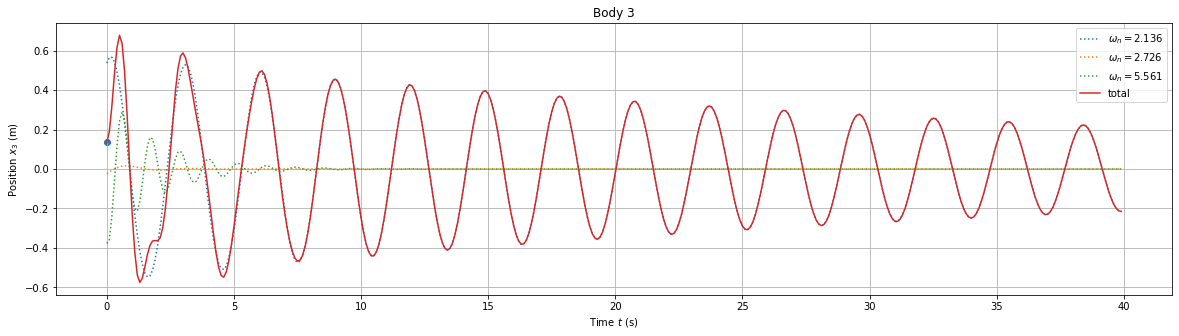

In [ ]:
print("Y.shape = ", Y.shape)
print("B.shape = ", B.shape)
for i in range(n):
    plt.figure(figsize=(20, 5))
    for j, wn in enumerate(wns):
        pos = B[i, j] * Y[j]
        plt.plot(t, pos, ls="dotted", label=r"$\omega_n=%.3f$"%wn)
    pos = B[i, :] @ Y
    plt.plot(t, pos, label="total")
    plt.scatter(0, x0[i])
    plt.title(r"Body %d" % (i+1))
    plt.legend()
    plt.grid()
    plt.xlabel(r"Time $t$ (s)")
    plt.ylabel(r"Position $x_{%d}$ (m)"%(i+1))

Text(0, 0.5, 'Position $x$ (m)')

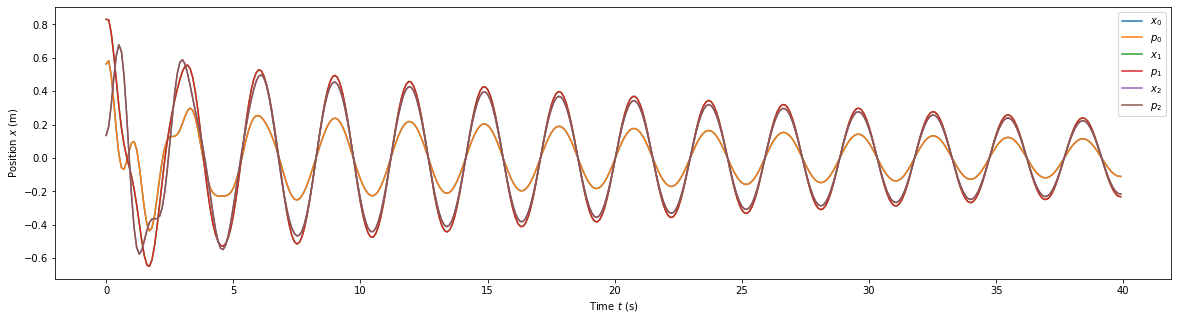

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(n):
    pos = B @ Y
    plt.plot(t, x[i], label=f"$x_{i}$")
    plt.plot(t, pos[i], label=f"$p_{i}$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Position $x$ (m)")